This jupyter notebook does the following three things:
1. Generates a precise parameter set to start at steady state
2. Show how brute force and lambda dynamics trajectories converge, using various dt and d0->0.25. Use this to also show the trajectory of the lambdas and the derivatives of the state variables.
3. Show trajectory of state variables and lambdas for w10 perturbation that blows up the theory.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Call in lambda dynamics code
import lambda_dynamics as ld
# Call in brute force code to cross check
import brute_force as bf
%matplotlib inline

# Generate parameters

In [2]:
# Initialize for tests. This should be as paper for initial conditions for all parameters
# state variables
s_d = np.array([320,230000,2.04*10**7]) #576
s = pd.Series(s_d, index=['S','N','E'])
# Set initial parameters from paper
p_d = np.array([0.2,0.2,500,1.,0.4096,2*10**7,0.0219]) #0.419394
p_i = pd.Series(p_d,index=['b0','d0','m0','w0','w10','Ec','mu'])
# Get precise parameter list and display it
p = ld.get_ss_params(s,p_i)
display(p)

b0     2.000000e-01
d0     2.000000e-01
m0     4.373344e+02
w0     1.000000e+00
w10    4.200929e-01
Ec     2.000000e+07
mu     2.148422e-02
dtype: float64

In [3]:
# Create perturbation to death rate
perturb = p.copy()
perturb['d0'] = 0.25

# Showing brute force and lambda dynamics are equivalent
All functions are documented, so if needed you can call ie. ?ld.iterate() to see what arguments it takes in. The brute force and lambda dynamics iteration code should be set up similarly.

For a standard perturbation, I have set it up so you need only put in how many steps you want to iterate, the state variables as a pandas series, and the perturbed parameter list. This then calculates the METE lambdas from those state variables, then calculates the corresponding derivatives of the state variables. For this to really work, you should ensure the first step gives small derivatives of state variables if you put in the pre perturbation parameters.

The code returns lambdas as an array, then state variables and their derivatives as pandas series.

In [118]:
# Generate lambda dynamics for a few different dt
l_ld_dt5, s_ld_dt5, ds_ld_dt5 = ld.iterate(8,s,perturb,dt=0.5)
l_ld_dt2, s_ld_dt2, ds_ld_dt2 = ld.iterate(20,s,perturb,dt=0.2)
l_ld_dt1, s_ld_dt1, ds_ld_dt1 = ld.iterate(40,s,perturb,dt=0.1)
#l_ld_dt05, s_ld_dt05, ds_ld_dt05 = ld.iterate(80,s,perturb,dt=0.05)

Iteration 1/8
Iteration 2/8
Iteration 3/8
Iteration 4/8
Iteration 5/8
Iteration 6/8
Iteration 7/8
Iteration 8/8
Iteration 1/20
Iteration 2/20
Iteration 3/20
Iteration 4/20
Iteration 5/20
Iteration 6/20
Iteration 7/20
Iteration 8/20
Iteration 9/20
Iteration 10/20
Iteration 11/20
Iteration 12/20
Iteration 13/20
Iteration 14/20
Iteration 15/20
Iteration 16/20
Iteration 17/20
Iteration 18/20
Iteration 19/20
Iteration 20/20
Iteration 1/40
Iteration 2/40
Iteration 3/40
Iteration 4/40
Iteration 5/40
Iteration 6/40
Iteration 7/40
Iteration 8/40
Iteration 9/40
Iteration 10/40
Iteration 11/40
Iteration 12/40
Iteration 13/40
Iteration 14/40
Iteration 15/40
Iteration 16/40
Iteration 17/40
Iteration 18/40
Iteration 19/40
Iteration 20/40
Iteration 21/40
Iteration 22/40
Iteration 23/40
Iteration 24/40
Iteration 25/40
Iteration 26/40
Iteration 27/40
Iteration 28/40
Iteration 29/40
Iteration 30/40
Iteration 31/40
Iteration 32/40
Iteration 33/40
Iteration 34/40
Iteration 35/40
Iteration 36/40
Iteration 

In [119]:
# Generate brute force for a few different dt
l_bf_dt5, s_bf_dt5, ds_bf_dt5 = bf.iterate(8,s,perturb,dt=0.5)
l_bf_dt2, s_bf_dt2, ds_bf_dt2 = bf.iterate(20,s,perturb,dt=0.2)
l_bf_dt1, s_bf_dt1, ds_bf_dt1 = bf.iterate(40,s,perturb,dt=0.1)
#l_bf_dt05, s_bf_dt05, ds_bf_dt05 = bf.iterate(80,s,perturb,dt=0.05)

Iteration 1/8
Iteration 2/8
Iteration 3/8
Iteration 4/8
Iteration 5/8
Iteration 6/8
Iteration 7/8
Iteration 8/8
Iteration 1/20
Iteration 2/20
Iteration 3/20
Iteration 4/20
Iteration 5/20
Iteration 6/20
Iteration 7/20
Iteration 8/20
Iteration 9/20
Iteration 10/20
Iteration 11/20
Iteration 12/20
Iteration 13/20
Iteration 14/20
Iteration 15/20
Iteration 16/20
Iteration 17/20
Iteration 18/20
Iteration 19/20
Iteration 20/20
Iteration 1/40
Iteration 2/40
Iteration 3/40
Iteration 4/40
Iteration 5/40
Iteration 6/40
Iteration 7/40
Iteration 8/40
Iteration 9/40
Iteration 10/40
Iteration 11/40
Iteration 12/40
Iteration 13/40
Iteration 14/40
Iteration 15/40
Iteration 16/40
Iteration 17/40
Iteration 18/40
Iteration 19/40
Iteration 20/40
Iteration 21/40
Iteration 22/40
Iteration 23/40
Iteration 24/40
Iteration 25/40
Iteration 26/40
Iteration 27/40
Iteration 28/40
Iteration 29/40
Iteration 30/40
Iteration 31/40
Iteration 32/40
Iteration 33/40
Iteration 34/40
Iteration 35/40
Iteration 36/40
Iteration 

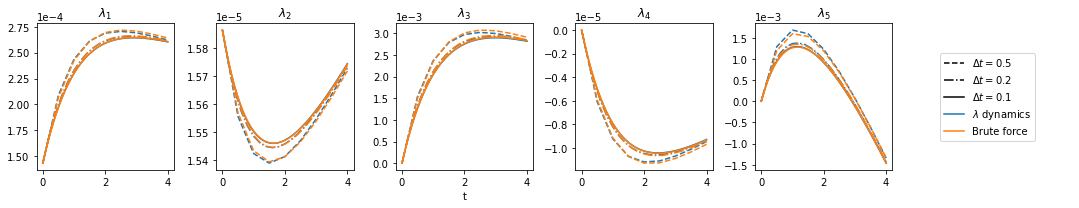

In [120]:
# Plot all of the lambdas
fig,axs = plt.subplots(nrows=1,ncols=6,sharex=True,figsize=(15,3))

for i,ax in enumerate(axs.flat):
    # Set up legend
    if i==5:
        dt5_label = ax.plot(np.linspace(0,4),[np.nan]*50,'--',c='k',label=r'$\Delta t = 0.5$')
        dt2_label = ax.plot(np.linspace(0,4),[np.nan]*50,'-.',c='k',label=r'$\Delta t = 0.2$')
        dt1_label = ax.plot(np.linspace(0,4),[np.nan]*50,c='k',label=r'$\Delta t = 0.1$')
        ld_label = ax.plot(np.linspace(0,4),[np.nan]*50,c='tab:blue',label=r'$\lambda$ dynamics')
        ld_label = ax.plot(np.linspace(0,4),[np.nan]*50,c='tab:orange',label=r'Brute force')
        ax.legend(loc='center left')
        ax.axis('off')
    else:
        # Title and scientific notation
        ax.set_title(r'$\lambda_{}$'.format(i+1))
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        # Lambda dynamics
        ax.plot(np.linspace(0,4,num=9),l_ld_dt5[:,i],'--',c='tab:blue',label=r'$\lambda$ dynamics, $\Delta t = 0.5$')
        ax.plot(np.linspace(0,4,num=21),l_ld_dt2[:,i],'-.',c='tab:blue',label=r'$\lambda$ dynamics, $\Delta t = 0.2$')
        ax.plot(np.linspace(0,4,num=41),l_ld_dt1[:,i],c='tab:blue',label=r'$\lambda$ dynamics, $\Delta t = 0.1$')
        # Brute force
        ax.plot(np.linspace(0,4,num=9),l_bf_dt5[:,i],'--',c='tab:orange',label=r'Brute force, $\Delta t = 0.5$')
        ax.plot(np.linspace(0,4,num=21),l_bf_dt2[:,i],'-.',c='tab:orange',label=r'Brute force, $\Delta t = 0.2$')
        ax.plot(np.linspace(0,4,num=41),l_bf_dt1[:,i],c='tab:orange',label=r'Brute force, $\Delta t = 0.1$')
# Labels
axs[2].set_xlabel('t')
# Fix layout
fig.tight_layout()
# save
fig.savefig('d0_lambda.pdf')

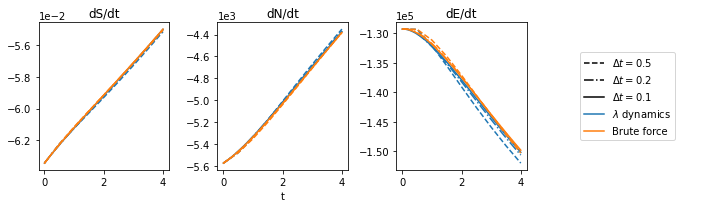

In [121]:
# Plot all of the derivatives of the state variables
fig,axs = plt.subplots(nrows=1,ncols=4,sharex=True,figsize=(10,3))

for i,ax in enumerate(axs.flat):
    # Do legend for the last one
    if i==3:
        dt5_label = ax.plot(np.linspace(0,4),[np.nan]*50,'--',c='k',label=r'$\Delta t = 0.5$')
        dt2_label = ax.plot(np.linspace(0,4),[np.nan]*50,'-.',c='k',label=r'$\Delta t = 0.2$')
        dt1_label = ax.plot(np.linspace(0,4),[np.nan]*50,c='k',label=r'$\Delta t = 0.1$')
        ld_label = ax.plot(np.linspace(0,4),[np.nan]*50,c='tab:blue',label=r'$\lambda$ dynamics')
        ld_label = ax.plot(np.linspace(0,4),[np.nan]*50,c='tab:orange',label=r'Brute force')
        ax.legend(loc='center left')
        ax.axis('off')
    else:
        dx = ds_ld_dt5.columns[i]
        # Set title
        ax.set_title(r'{}/dt'.format(dx))
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        # Lambda dynamics
        ax.plot(np.linspace(0,4,num=9),ds_ld_dt5[dx],'--',c='tab:blue',label=r'$\lambda$ dynamics, $\Delta t = 0.5$')
        ax.plot(np.linspace(0,4,num=21),ds_ld_dt2[dx],'-.',c='tab:blue',label=r'$\lambda$ dynamics, $\Delta t = 0.2$')
        ax.plot(np.linspace(0,4,num=41),ds_ld_dt1[dx],c='tab:blue',label=r'$\lambda$ dynamics, $\Delta t = 0.1$')
        # Brute force
        ax.plot(np.linspace(0,4,num=9),ds_bf_dt5[dx],'--',c='tab:orange',label=r'Brute force, $\Delta t = 0.5$')
        ax.plot(np.linspace(0,4,num=21),ds_bf_dt2[dx],'-.',c='tab:orange',label=r'Brute force, $\Delta t = 0.2$')
        ax.plot(np.linspace(0,4,num=41),ds_bf_dt1[dx],c='tab:orange',label=r'Brute force, $\Delta t = 0.1$')
# Labels
axs[1].set_xlabel('t')
# Fix layout()
fig.tight_layout()
# Save
fig.savefig('d0_dX.pdf')

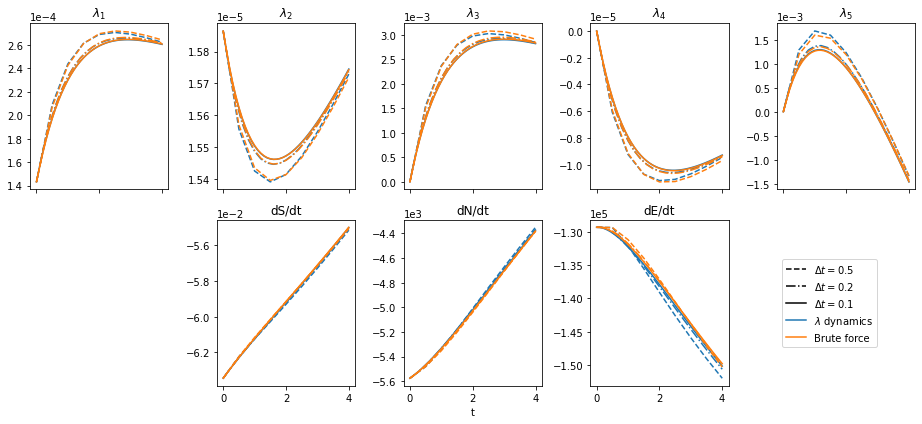

In [122]:
# One figure together
# Plot all of the lambdas
fig,axs = plt.subplots(nrows=2,ncols=5,sharex=True,figsize=(13,6))

for i,ax in enumerate(axs.flat):
    # Don't use the first slot in the second row
    if i==5:
        ax.axis('off')
    # Set up legend for highest i
    elif i==9:
        dt5_label = ax.plot(np.linspace(0,4),[np.nan]*50,'--',c='k',label=r'$\Delta t = 0.5$')
        dt2_label = ax.plot(np.linspace(0,4),[np.nan]*50,'-.',c='k',label=r'$\Delta t = 0.2$')
        dt1_label = ax.plot(np.linspace(0,4),[np.nan]*50,c='k',label=r'$\Delta t = 0.1$')
        ld_label = ax.plot(np.linspace(0,4),[np.nan]*50,c='tab:blue',label=r'$\lambda$ dynamics')
        ld_label = ax.plot(np.linspace(0,4),[np.nan]*50,c='tab:orange',label=r'Brute force')
        ax.legend(loc='center left')
        ax.axis('off')
    elif i < 5:
        # Get lambdas
        # Title and scientific notation
        ax.set_title(r'$\lambda_{}$'.format(i+1))
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        # Lambda dynamics
        ax.plot(np.linspace(0,4,num=9),l_ld_dt5[:,i],'--',c='tab:blue',label=r'$\lambda$ dynamics, $\Delta t = 0.5$')
        ax.plot(np.linspace(0,4,num=21),l_ld_dt2[:,i],'-.',c='tab:blue',label=r'$\lambda$ dynamics, $\Delta t = 0.2$')
        ax.plot(np.linspace(0,4,num=41),l_ld_dt1[:,i],c='tab:blue',label=r'$\lambda$ dynamics, $\Delta t = 0.1$')
        # Brute force
        ax.plot(np.linspace(0,4,num=9),l_bf_dt5[:,i],'--',c='tab:orange',label=r'Brute force, $\Delta t = 0.5$')
        ax.plot(np.linspace(0,4,num=21),l_bf_dt2[:,i],'-.',c='tab:orange',label=r'Brute force, $\Delta t = 0.2$')
        ax.plot(np.linspace(0,4,num=41),l_bf_dt1[:,i],c='tab:orange',label=r'Brute force, $\Delta t = 0.1$')
    else:
        dx = ds_ld_dt5.columns[i-6]
        # Set title
        ax.set_title(r'{}/dt'.format(dx))
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        # Lambda dynamics
        ax.plot(np.linspace(0,4,num=9),ds_ld_dt5[dx],'--',c='tab:blue',label=r'$\lambda$ dynamics, $\Delta t = 0.5$')
        ax.plot(np.linspace(0,4,num=21),ds_ld_dt2[dx],'-.',c='tab:blue',label=r'$\lambda$ dynamics, $\Delta t = 0.2$')
        ax.plot(np.linspace(0,4,num=41),ds_ld_dt1[dx],c='tab:blue',label=r'$\lambda$ dynamics, $\Delta t = 0.1$')
        # Brute force
        ax.plot(np.linspace(0,4,num=9),ds_bf_dt5[dx],'--',c='tab:orange',label=r'Brute force, $\Delta t = 0.5$')
        ax.plot(np.linspace(0,4,num=21),ds_bf_dt2[dx],'-.',c='tab:orange',label=r'Brute force, $\Delta t = 0.2$')
        ax.plot(np.linspace(0,4,num=41),ds_bf_dt1[dx],c='tab:orange',label=r'Brute force, $\Delta t = 0.1$')
# Labels
axs[1,2].set_xlabel('t')
# Fix layout
fig.tight_layout()
# save
fig.savefig('d0_X_lambda.pdf')

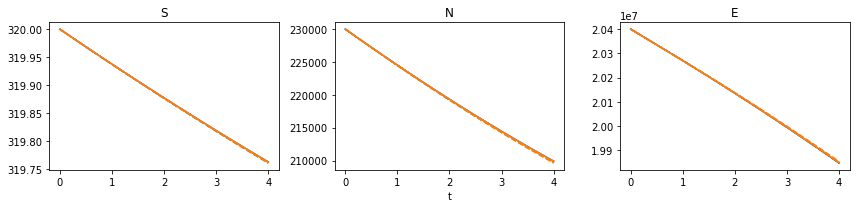

In [123]:
# Plot all of the state variables, though this isn't super interesting.
fig,axs = plt.subplots(nrows=1,ncols=3,sharex=True,figsize=(12,3))

for x,ax in zip(s.index,axs.flat):
    ax.set_title(r'{}'.format(x))
    # Lambda dynamics
    ax.plot(np.linspace(0,4,num=9),s_ld_dt5[x],'--',c='tab:blue',label=r'$\lambda$ dynamics, $\Delta t = 0.5$')
    ax.plot(np.linspace(0,4,num=21),s_ld_dt2[x],'-.',c='tab:blue',label=r'$\lambda$ dynamics, $\Delta t = 0.2$')
    ax.plot(np.linspace(0,4,num=41),s_ld_dt1[x],c='tab:blue',label=r'$\lambda$ dynamics, $\Delta t = 0.1$')
    # Brute force
    ax.plot(np.linspace(0,4,num=9),s_bf_dt5[x],'--',c='tab:orange',label=r'Brute force, $\Delta t = 0.5$')
    ax.plot(np.linspace(0,4,num=21),s_bf_dt2[x],'-.',c='tab:orange',label=r'Brute force, $\Delta t = 0.2$')
    ax.plot(np.linspace(0,4,num=41),s_bf_dt1[x],c='tab:orange',label=r'Brute force, $\Delta t = 0.1$')
# Labels
axs[1].set_xlabel('t')
# Layout fix
fig.tight_layout()

# Showing where the theory blows up

In [5]:
# Create perturbation to w10
perturb2 = p.copy()
perturb2['w10'] = 0.4096 # Make this the paper value

In [6]:
l_w,s_w,ds_w = ld.iterate(30,s,perturb2,dt=0.1)

Iteration 1/30
Iteration 2/30
Iteration 3/30
Iteration 4/30
Iteration 5/30
Iteration 6/30
Iteration 7/30
Iteration 8/30
Iteration 9/30
Iteration 10/30
Iteration 11/30
Iteration 12/30
Iteration 13/30
Iteration 14/30
Iteration 15/30
Iteration 16/30
Iteration 17/30
Iteration 18/30
Iteration 19/30
Iteration 20/30
Iteration 21/30
Iteration 22/30
Iteration 23/30
Iteration 24/30
Iteration 25/30
Iteration 26/30
Iteration 27/30
Iteration 28/30
Iteration 29/30
Iteration 30/30


/Users/micbru/Documents/Research/2020Iteration/DissertationCode/DynaMETE_Rfunctions.py:115: RuntimeWarning: divide by zero encountered in double_scalars
  return t1-t2+t3fac*t3num/t3denom
/Users/micbru/anaconda3/lib/python3.6/site-packages/scipy/integrate/_quad_vec.py:503: RuntimeWarning: invalid value encountered in subtract
  s_k_dabs += v[i] * abs(fv[i] - y0)
/Users/micbru/Documents/Research/2020Iteration/DissertationCode/means_covariances.py:75: RuntimeWarning: invalid value encountered in double_scalars
  return fn_e13(s,p)*m['n_e13'] + fn(s,p)*m['n']
/Users/micbru/Documents/Research/2020Iteration/DissertationCode/means_covariances.py:78: RuntimeWarning: invalid value encountered in double_scalars
  return hne23(s,p)*m['ne23'] + hne(s,p)*m['ne'] + hn(s,p)*m['n']


In [7]:
l_bf_w,s_bf_w,ds_bf_w = bf.iterate(31,s,perturb2,dt=0.1)

Iteration 1/31
Iteration 2/31
Iteration 3/31
Iteration 4/31
Iteration 5/31
Iteration 6/31
Iteration 7/31
Iteration 8/31
Iteration 9/31
Iteration 10/31
Iteration 11/31
Iteration 12/31
Iteration 13/31
Iteration 14/31
Iteration 15/31
Iteration 16/31
Iteration 17/31
Iteration 18/31
Iteration 19/31
Iteration 20/31
Iteration 21/31
Iteration 22/31
Iteration 23/31
Iteration 24/31
Iteration 25/31
Iteration 26/31
Iteration 27/31
Iteration 28/31
Iteration 29/31
Iteration 30/31
Iteration 31/31


/Users/micbru/Documents/Research/2020Iteration/DissertationCode/DynaMETE_Rfunctions.py:115: RuntimeWarning: invalid value encountered in double_scalars
  return t1-t2+t3fac*t3num/t3denom
/Users/micbru/Documents/Research/2020Iteration/DissertationCode/DynaMETE_Rfunctions.py:94: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return integrate.quad(lambda loge: np.exp(loge)*Rsum(np.exp(loge),l,s,p),0,np.log(s['E']))[0]
/Users/micbru/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


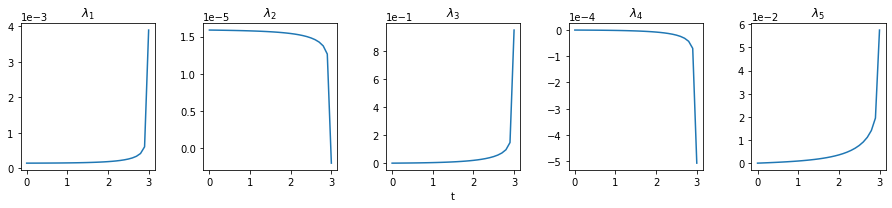

In [133]:
# Plot all of the lambdas
fig,axs = plt.subplots(nrows=1,ncols=5,sharex=True,figsize=(12.5,3))

for i,ax in enumerate(axs.flat):
    # Title and scientific notation
    ax.set_title(r'$\lambda_{}$'.format(i+1))
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    # Lambda dynamics
    ax.plot(np.linspace(0,3,num=31),l_w[:,i],c='tab:blue',label=r'$\lambda$ dynamics, $\Delta t = 0.1$')
# Labels
axs[2].set_xlabel('t')
# Fix layout
fig.tight_layout()

fig.savefig('w10_lambda.pdf')

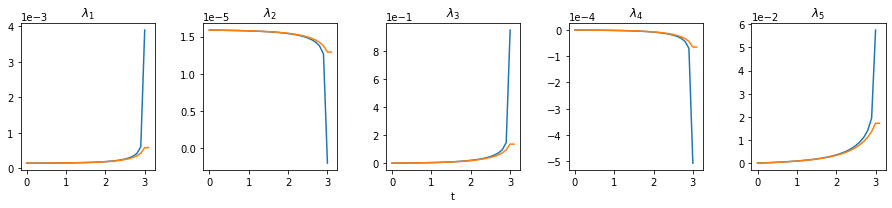

In [8]:
# Is lambda dynamics and brute force the same?
fig,axs = plt.subplots(nrows=1,ncols=5,sharex=True,figsize=(12.5,3))

for i,ax in enumerate(axs.flat):
    # Title and scientific notation
    ax.set_title(r'$\lambda_{}$'.format(i+1))
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    # Lambda dynamics
    ax.plot(np.linspace(0,3,num=31),l_w[:,i],c='tab:blue',label=r'$\lambda$ dynamics, $\Delta t = 0.1$')
    # Brute force
    ax.plot(np.linspace(0,3.1,num=32),l_bf_w[:,i],c='tab:orange',label=r'Brute force, $\Delta t = 0.1$')
# Labels
axs[2].set_xlabel('t')
# Fix layout
fig.tight_layout()

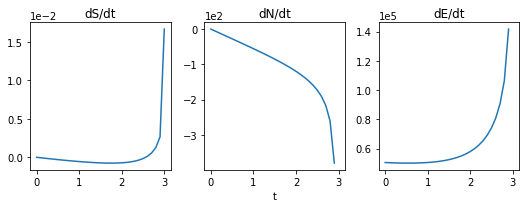

In [135]:
# Plot all of the derivatives of the state variables
fig,axs = plt.subplots(nrows=1,ncols=3,sharex=True,figsize=(7.5,3))

for dx,ax in zip(ds_ld_dt5.columns,axs.flat):
    # Set title
    ax.set_title(r'{}/dt'.format(dx))
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    # Lambda dynamics
    ax.plot(np.linspace(0,3,num=31),ds_w[dx],c='tab:blue',label=r'$\lambda$ dynamics, $\Delta t = 0.1$')
# Labels
axs[1].set_xlabel('t')
# Fix layout()
fig.tight_layout()

fig.savefig('w10_dX.pdf')

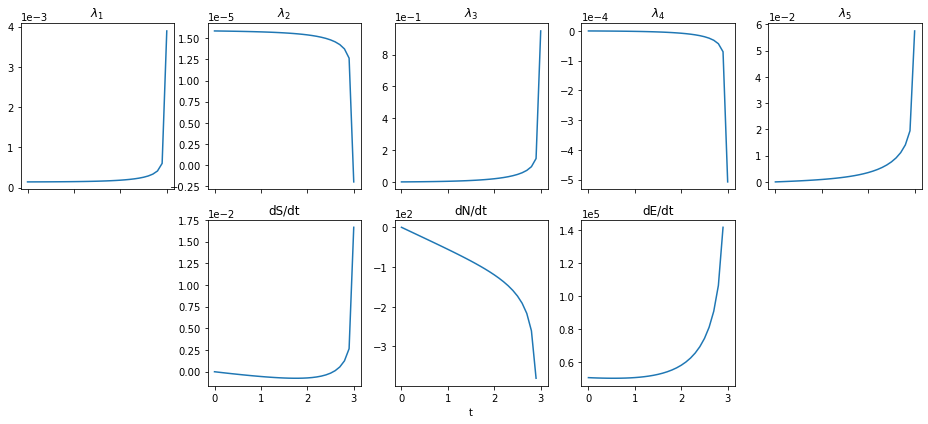

In [136]:
# Combined together
fig,axs = plt.subplots(nrows=2,ncols=5,sharex=True,figsize=(13,6))

for i,ax in enumerate(axs.flat):
    # Don't use the first slot in the second row
    if i==5:
        ax.axis('off')
    elif i==9:
        ax.axis('off')
    elif i < 5:
        # Get lambdas
        # Title and scientific notation
        ax.set_title(r'$\lambda_{}$'.format(i+1))
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        # Lambda dynamics
        ax.plot(np.linspace(0,3,num=31),l_w[:,i],c='tab:blue',label=r'$\lambda$ dynamics, $\Delta t = 0.1$')
    else:
        dx = ds_ld_dt5.columns[i-6]
        # Set title
        ax.set_title(r'{}/dt'.format(dx))
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        # Lambda dynamics
        ax.plot(np.linspace(0,3,num=31),ds_w[dx],c='tab:blue',label=r'$\lambda$ dynamics, $\Delta t = 0.1$')
# Labels
axs[1,2].set_xlabel('t')
# Fix layout
fig.tight_layout()
# save
fig.savefig('w10_X_lambda.pdf')

In [ ]:
# Combined together
fig,axs = plt.subplots(nrows=2,ncols=5,sharex=True,figsize=(13,6))

for i,ax in enumerate(axs.flat):
    # Don't use the first slot in the second row
    if i==5:
        ax.axis('off')
    elif i==9:
        ld_label = ax.plot(np.linspace(0,4),[np.nan]*50,c='tab:blue',label=r'$\lambda$ dynamics')
        ld_label = ax.plot(np.linspace(0,4),[np.nan]*50,c='tab:orange',label=r'Brute force')
        ax.legend(loc='center left')
        ax.axis('off')
    elif i < 5:
        # Get lambdas
        # Title and scientific notation
        ax.set_title(r'$\lambda_{}$'.format(i+1))
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        # Lambda dynamics
        ax.plot(np.linspace(0,3,num=31),l_w[:,i],c='tab:blue',label=r'$\lambda$ dynamics, $\Delta t = 0.1$')
        # Brute force
        ax.plot(np.linspace(0,3.1,num=32),l_bf_w[:,i],c='tab:orange',label=r'Brute force, $\Delta t = 0.1$')
    else:
        dx = ds_ld_dt5.columns[i-6]
        # Set title
        ax.set_title(r'{}/dt'.format(dx))
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        # Lambda dynamics
        ax.plot(np.linspace(0,3,num=31),ds_w[dx],c='tab:blue',label=r'$\lambda$ dynamics, $\Delta t = 0.1$')
        # Brute force
        ax.plot(np.linspace(0,3.1,num=32),ds_bf_w[dx],c='tab:orange',label=r'Brute force, $\Delta t = 0.1$')
# Labels
axs[1,2].set_xlabel('t')
# Fix layout
fig.tight_layout()
# save
fig.savefig('w10_X_lambda_bf_ld.pdf')

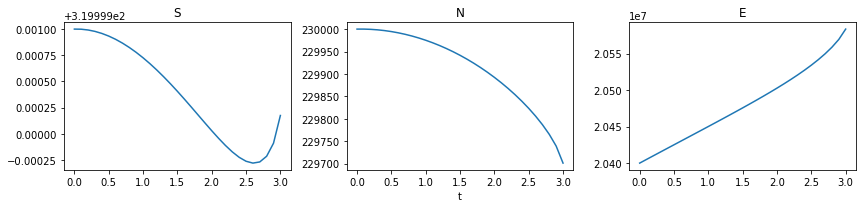

In [137]:
# Plot all of the state variables, though this isn't super interesting.
fig,axs = plt.subplots(nrows=1,ncols=3,sharex=True,figsize=(12,3))

for x,ax in zip(s.index,axs.flat):
    ax.set_title(r'{}'.format(x))
    # Lambda dynamics
    ax.plot(np.linspace(0,3,num=31),s_w[x],c='tab:blue',label=r'$\lambda$ dynamics, $\Delta t = 0.1$')
# Labels
axs[1].set_xlabel('t')
# Layout fix
fig.tight_layout()